In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

D:\anaconda3\envs\karpov\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\anaconda3\envs\karpov\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('Samara_flat_data12.csv')
df.head()

,Unnamed: 0,id,Цена,Цена за кв.метр,Количество собственников,Район,Улица,Вид сделки,Количество комнат,Общая площадь,Площадь кухни,Жилая площадь,Этаж,Этажей в доме,Балкон или лоджия,Высота потолков,Санузел,Окна,Ремонт,Техника,Способ продажи,Тип дома,Год постройки,Пассажирский лифт,Грузовой лифт,В доме,Двор,Парковка,Дополнительно,Тип комнат,Мебель,Тип продавца,Data_added,latitude,longitude,center_distance,metro_distance
0,0,7369217589,9350000.0,110000.0,1 собственник,Kirovsky,"18-й километр, 37",возможна ипотека,3,85.0,17.5,NaN,25.0,25.0,балкон,NaN,раздельный,NaN,дизайнерский,NaN,свободная,монолитный,2021.0,1,2,NaN,"детская площадка, спортивная площадка",открытая во дворе,панорамные окна,изолированные,"кухня, хранение одежды, спальные места",агентство,2025-05-27,NaN,NaN,NaN,NaN
1,1,7373532517,8200000.0,197590.0,1 собственник,Oktyabrsky,"Московское ш., 29",NaN,студия,41.5,NaN,41.5,17.0,24.0,балкон,2.7,совмещенный,"во двор, на солнечную сторону",дизайнерский,"кондиционер, холодильник, стиральная машина",свободная,монолитный,NaN,3,3,NaN,"детская площадка, спортивная площадка",подземная,гардеробная,NaN,"кухня, хранение одежды, спальные места",частное лицо,2025-05-27,53.218473,50.191275,7.14,2.04
2,4,4962057121,11200000.0,129032.0,2 собственника или больше,Zheleznodorozhny,"Революционная ул., 146А",NaN,3,86.8,12.1,47.5,1.0,11.0,лоджия,2.7,раздельный,"во двор, на солнечную сторону",евро,NaN,свободная,кирпичный,2000.0,1,1,газ,"детская площадка, спортивная площадка","подземная, открытая во дворе",NaN,изолированные,"кухня, хранение одежды",частное лицо,2025-05-27,53.195040,50.181259,5.80,0.64
3,5,7277003594,7400000.0,208451.0,1 собственник,Oktyabrsky,"ул. Осипенко, 2Б",возможна ипотека,1,35.5,7.6,18.8,1.0,16.0,лоджия,2.7,совмещенный,во двор,косметический,"холодильник, стиральная машина",свободная,кирпичный,1977.0,1,1,"мусоропровод, газ","детская площадка, спортивная площадка",открытая во дворе,NaN,NaN,"кухня, хранение одежды, спальные места",агентство,2025-05-27,53.214430,50.131862,3.59,0.58
4,6,4485182305,4999000.0,89428.0,2 собственника или больше,Promyshlenny,"Воронежская ул., 188",NaN,3,55.9,6.0,35.0,1.0,5.0,NaN,NaN,раздельный,NaN,косметический,NaN,свободная,кирпичный,NaN,нет,нет,NaN,NaN,NaN,NaN,изолированные,"кухня, хранение одежды, спальные места",агентство,2025-05-27,53.238580,50.222773,10.06,3.35


## Переименовываем колонки

In [3]:
df = df.rename(
            columns={
                "URL": "url",
                "Цена": "price",
                "Цена за кв.метр": "price_per_sqm",
                "Количество собственников": "number_of_owners",
                "Район": "district",
                "Улица": "street",
                "Вид сделки": "deal_type",
                "Количество комнат": "number_of_rooms",
                "Общая площадь": "total_area",
                "Площадь кухни": "kitchen_area",
                "Жилая площадь": "living_area",
                "Этаж": "floor",
                "Этажей в доме": "floors_in_building",
                "Балкон или лоджия": "balcony_or_loggia",
                "Высота потолков": "ceiling_height",
                "Санузел": "bathroom",
                "Окна": "windows",
                "Ремонт": "renovation",
                "Техника": "appliances",
                "Способ продажи": "sale_method",
                "Тип дома": "building_type",
                "Год постройки": "year_built",
                "Пассажирский лифт": "passenger_elevator",
                "Грузовой лифт": "freight_elevator",
                "В доме": "in_building",
                "Двор": "courtyard",
                "Парковка": "parking",
                "Дополнительно": "additional_info",
                "Тип комнат": "room_type",
                "Мебель": "furniture",
                "Тип продавца": "seller_type",
                "Data_added": "data_added",
            }
        )

## EDA

### Первичный осмотр

In [4]:
df.shape

(5678, 37)

In [5]:
df.dtypes.value_counts()

object     22
float64    13
int64       2
dtype: int64

In [6]:
# Исследуем количество пропусков
null_count = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
null_values = pd.DataFrame({
    'column_name': df.columns,
    'null_count': null_count.values,
    'null_percentage': null_percentage.values
}).set_index('column_name').T
null_values

column_name,Unnamed: 0,id,price,price_per_sqm,number_of_owners,district,street,deal_type,number_of_rooms,total_area,kitchen_area,living_area,floor,floors_in_building,balcony_or_loggia,ceiling_height,bathroom,windows,renovation,appliances,sale_method,building_type,year_built,passenger_elevator,freight_elevator,in_building,courtyard,parking,additional_info,room_type,furniture,seller_type,data_added,latitude,longitude,center_distance,metro_distance
null_count,0.0,0.0,1.000000,0.0,0.0,728.000000,0.0,2075.000000,0.0,0.0,410.000000,1082.000000,0.0,0.0,1544.000000,2440.000000,697.000000,1555.000000,938.000000,3462.000000,511.000000,4.000000,2308.000000,1437.000000,1899.000000,3148.000000,1630.000000,1647.000000,4699.000000,2437.000000,2956.000000,0.0,0.0,763.00000,763.00000,449.000000,449.000000
null_percentage,0.0,0.0,0.017612,0.0,0.0,12.821416,0.0,36.544558,0.0,0.0,7.220852,19.056006,0.0,0.0,27.192673,42.972878,12.275449,27.386404,16.519901,60.972173,8.999648,0.070447,40.648116,25.308207,33.444875,55.442057,28.707291,29.006692,82.758013,42.920042,52.060585,0.0,0.0,13.43783,13.43783,7.907714,7.907714


In [7]:
#Сводная статистика по числовым характеристикам
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe().round(3)

,Unnamed: 0,id,price,price_per_sqm,total_area,kitchen_area,living_area,floor,floors_in_building,ceiling_height,year_built,latitude,longitude,center_distance,metro_distance
count,5678.000,5.678000e+03,5.677000e+03,5678.000,5678.000,5268.000,4596.000,5678.000,5678.000,3238.000,3370.000,4915.000,4915.000,5229.000,5229.000
mean,1233.045,5.673618e+09,7.292827e+06,127322.858,55.408,11.487,30.209,6.196,11.356,11.102,1987.736,53.222,50.241,12.602,7.730
std,813.713,1.677224e+09,5.719497e+06,45734.104,34.462,7.457,15.569,5.002,6.996,123.665,97.814,0.108,1.727,110.608,110.381
min,0.000,1.848118e+08,8.000000e+05,5600.000,12.500,2.000,5.000,1.000,1.000,0.000,0.000,47.829,48.403,0.060,0.050
25%,553.000,4.342343e+09,4.150000e+06,99326.750,38.500,7.000,18.000,2.000,5.000,2.500,1972.000,53.197,50.148,5.470,1.210
50%,1114.000,4.978026e+09,5.799999e+06,118076.000,49.000,9.600,28.750,5.000,9.000,2.700,1992.000,53.218,50.198,8.260,2.730
75%,1823.750,7.326790e+09,8.400000e+06,145427.500,65.000,13.300,38.800,8.000,16.000,2.700,2015.000,53.245,50.241,11.670,5.830
max,2965.000,7.447733e+09,8.800000e+07,1110886.000,1327.000,84.000,240.000,30.000,37.000,2900.000,2025.000,54.425,131.225,5470.830,5458.680


In [8]:
#Сводная статистика по категориальным признакам
categorical_features = df.select_dtypes(include=[object])
categorical_features.describe()

,number_of_owners,district,street,deal_type,number_of_rooms,balcony_or_loggia,bathroom,windows,renovation,appliances,sale_method,building_type,passenger_elevator,freight_elevator,in_building,courtyard,parking,additional_info,room_type,furniture,seller_type,data_added
count,5678,4950,5678,3603,5678,4134,4981,4123,4740,2216,5167,5674,4241,3779,2530,4048,4031,979,3241,2722,5678,5678
unique,36,11,2987,4,10,3,3,7,4,31,4,6,5,5,7,7,15,3,3,7,2,8
top,1 собственник,Kirovsky,"ул. Олега Пешкова, стр. 9",возможна ипотека,1,лоджия,совмещенный,во двор,косметический,кондиционер,свободная,кирпичный,1,нет,газ,"детская площадка, спортивная площадка",открытая во дворе,гардеробная,изолированные,"кухня, хранение одежды, спальные места",агентство,2025-05-27
freq,2075,950,94,3582,2004,2256,3072,1487,2119,488,4492,2973,2391,2113,1791,1909,3111,636,2627,1367,3663,1558


### Поиск аномалий

#### Общая площадь

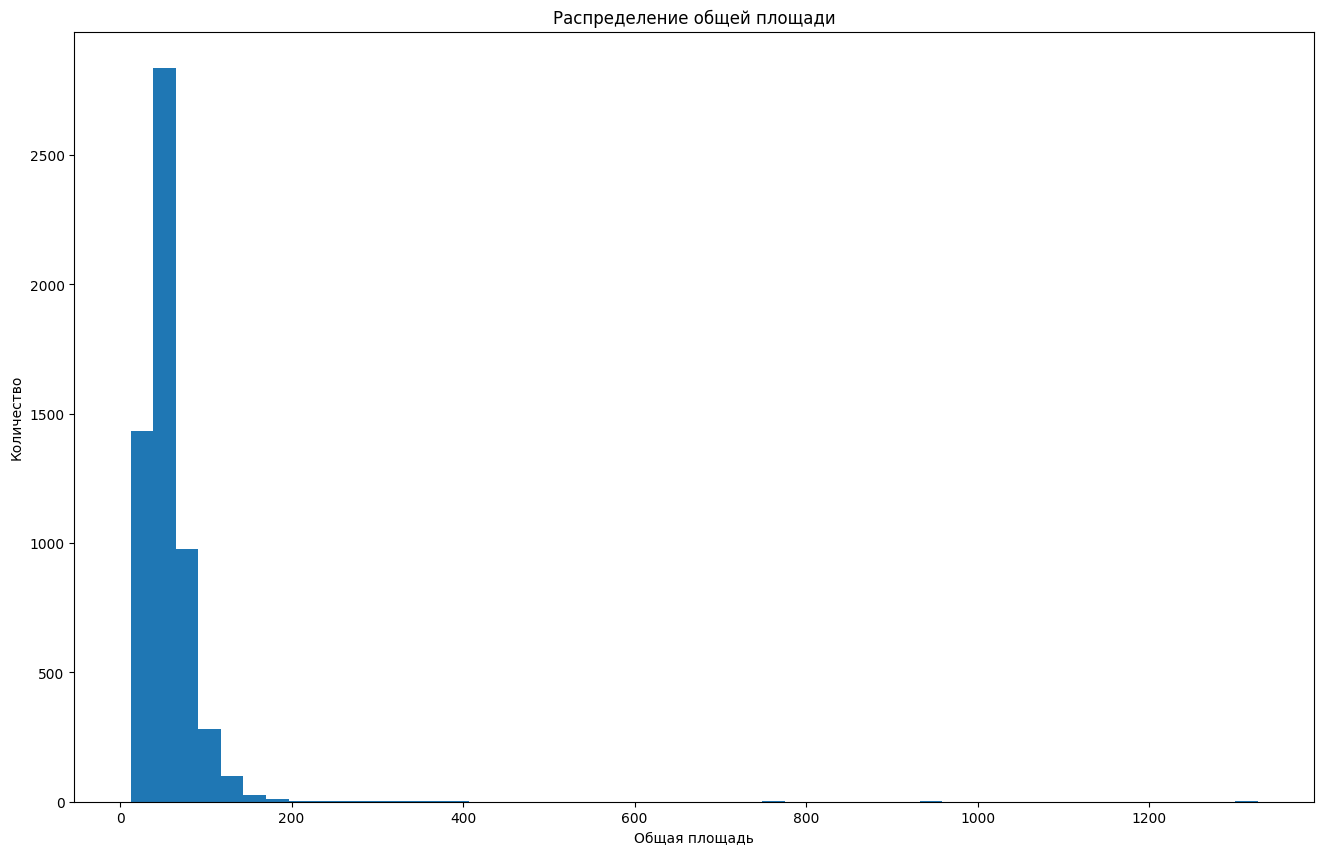

In [9]:
plt.figure(figsize=(16, 10))
plt.hist(df['total_area'], bins=50,)
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество')
plt.show()

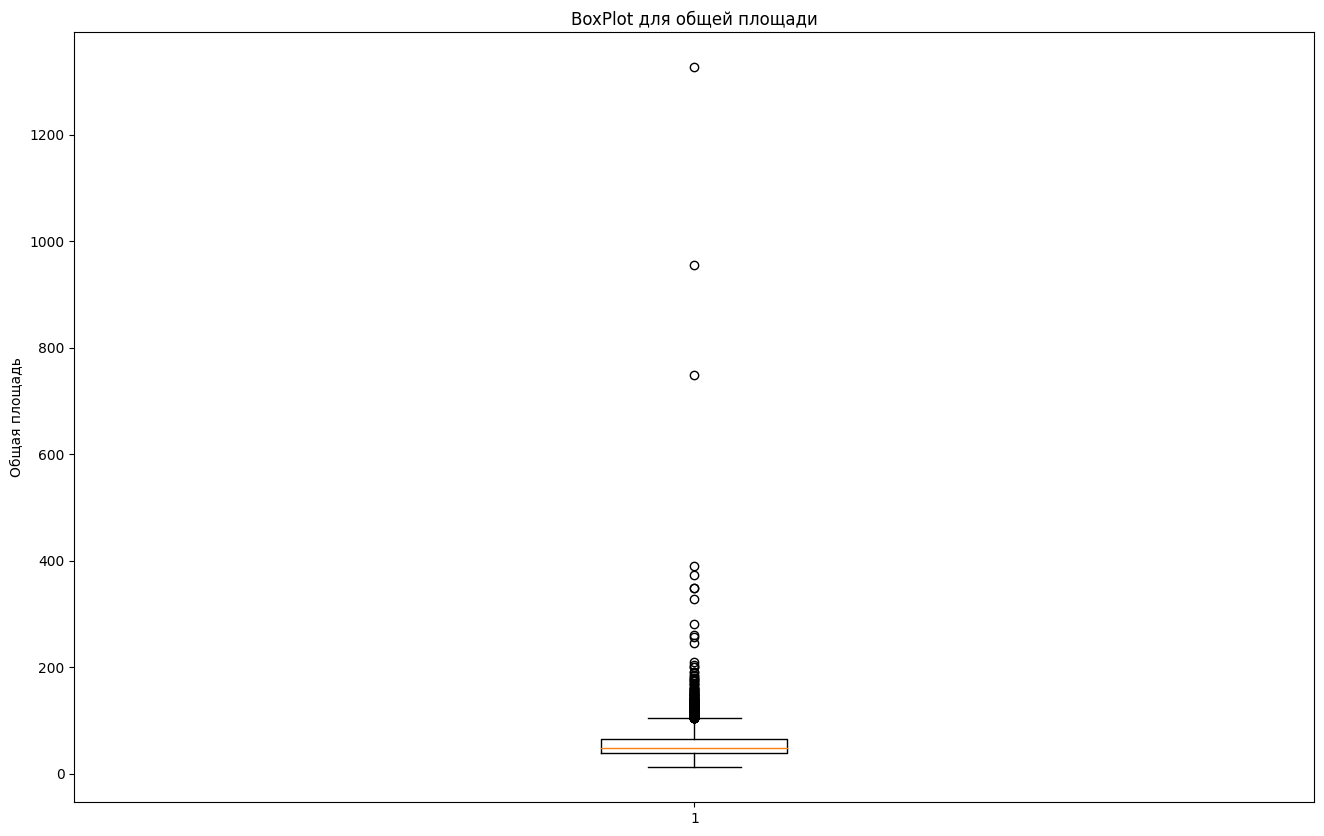

In [10]:
plt.figure(figsize=(16, 10))
plt.boxplot(df['total_area'])
plt.title('BoxPlot для общей площади')
plt.ylabel('Общая площадь')
plt.show()

In [11]:
total_area_outliers = df[(df['total_area'] > 600)]
total_area_outliers

,Unnamed: 0,id,price,price_per_sqm,number_of_owners,district,street,deal_type,number_of_rooms,total_area,kitchen_area,living_area,floor,floors_in_building,balcony_or_loggia,ceiling_height,bathroom,windows,renovation,appliances,sale_method,building_type,year_built,passenger_elevator,freight_elevator,in_building,courtyard,parking,additional_info,room_type,furniture,seller_type,data_added,latitude,longitude,center_distance,metro_distance
310,333,7293185341,4200000.0,5600.0,1 собственник,Promyshlenny,"ул. Победы, 102",возможна ипотека,3,750.0,8.0,69.2,3.0,4.0,балкон,3.0,раздельный,на улицу,требует ремонта,NaN,свободная,кирпичный,1941.0,нет,нет,газ,детская площадка,открытая во дворе,NaN,изолированные,NaN,агентство,2025-05-27,53.217332,50.257159,11.24,0.78
510,570,7418547988,6600000.0,6904.0,2 собственника или больше,NaN,"пр-т Масленникова, 15",продажа доли,3,956.0,12.0,90.0,3.0,4.0,балкон,2900.0,совмещенный,"во двор, на улицу, на солнечную сторону",дизайнерский,"кондиционер, холодильник, стиральная машина, п...",свободная,кирпичный,1958.0,нет,нет,газ,"закрытая территория, детская площадка, спортив...",открытая во дворе,NaN,изолированные,"кухня, хранение одежды, спальные места",частное лицо,2025-05-27,NaN,NaN,NaN,NaN
4435,868,7354454060,14990000.0,11296.0,1 собственник,Promyshlenny,"8-я просека, 60",возможна ипотека,3,1327.0,62.0,132.7,4.0,4.0,лоджия,2.8,совмещенный,на солнечную сторону,евро,"кондиционер, водонагреватель",свободная,кирпичный,2008.0,нет,нет,NaN,NaN,"подземная, открытая во дворе",гардеробная,изолированные,кухня,агентство,2025-05-07,53.262191,50.203005,10.72,6.28


In [12]:
df = df.drop([310, 510, 4435], axis=0)

#### Жилая площадь

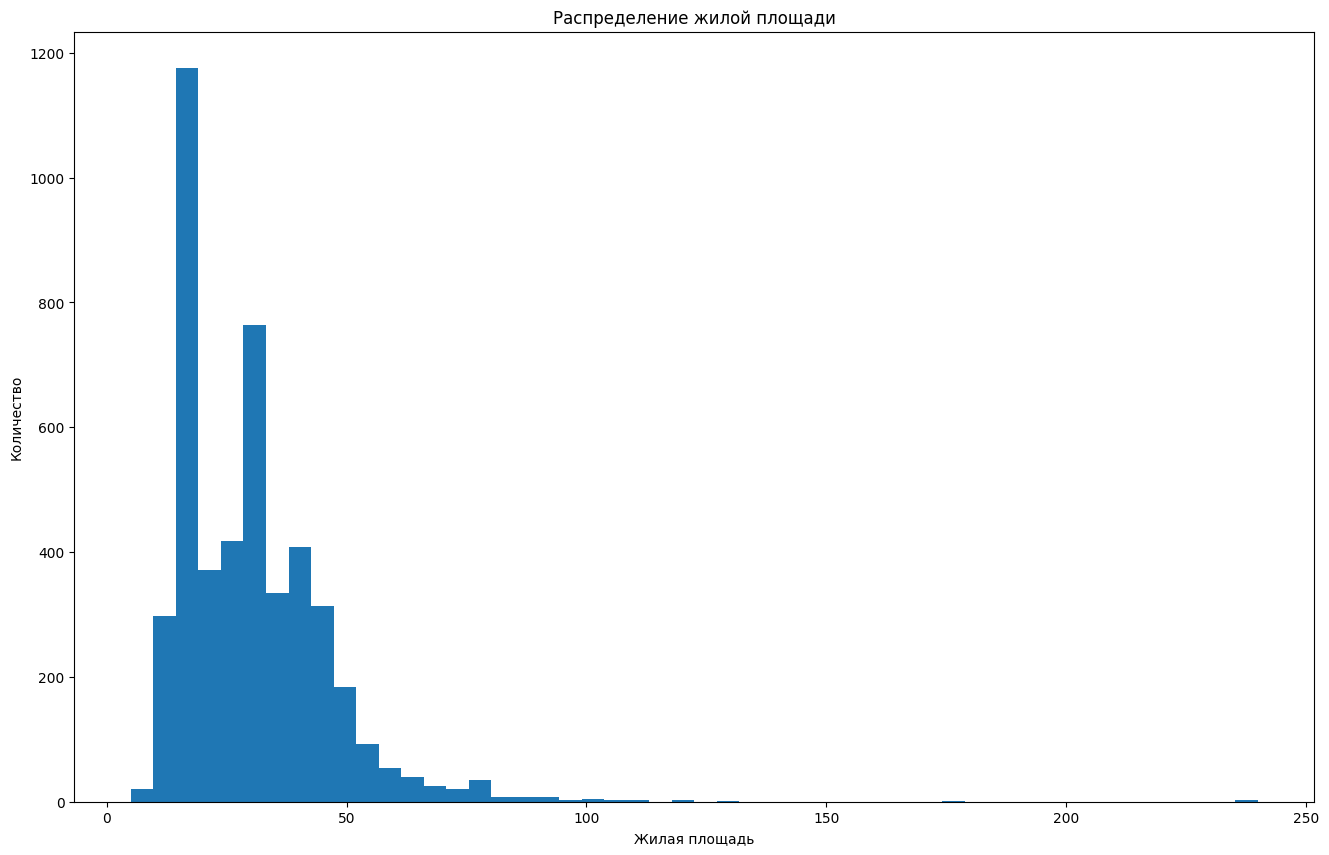

In [13]:
plt.figure(figsize=(16, 10))
plt.hist(df['living_area'], bins=50,)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.show()

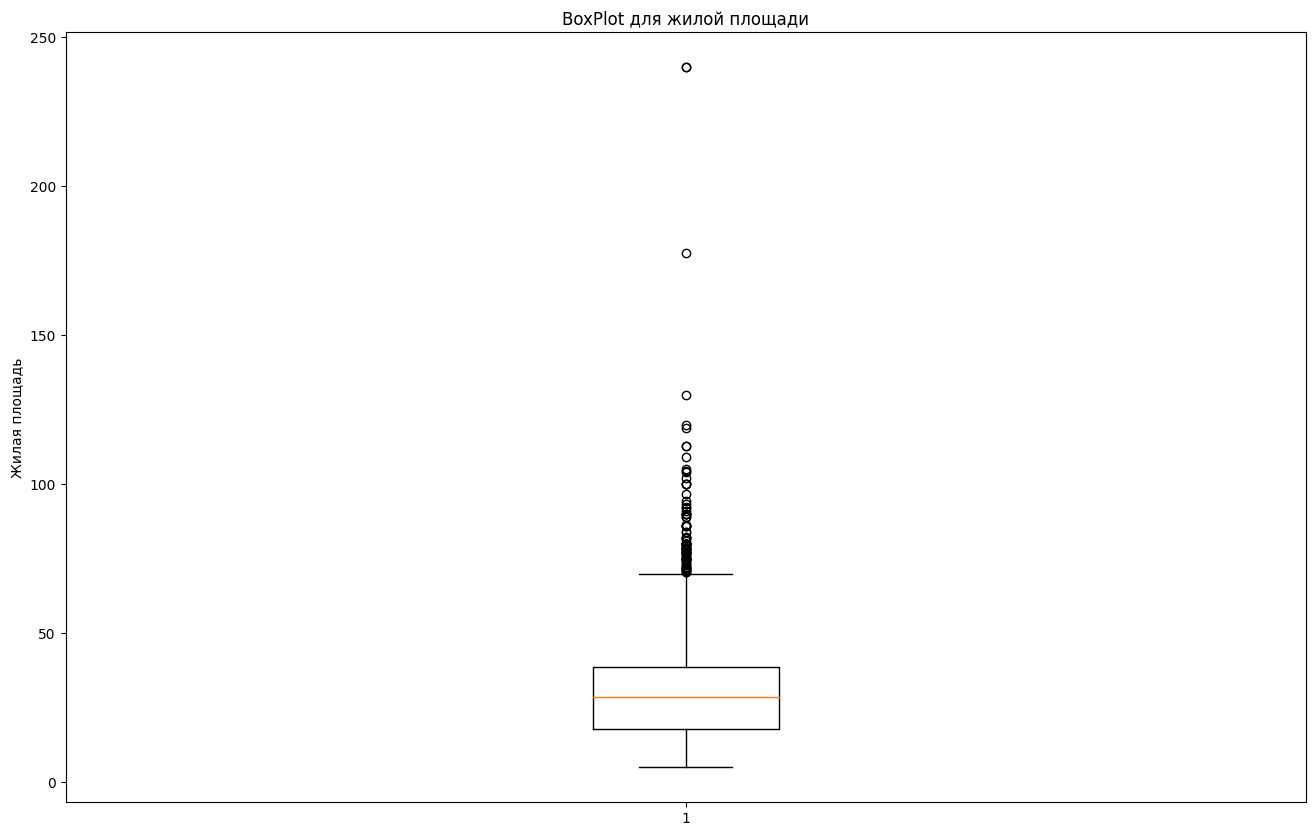

In [14]:
plt.figure(figsize=(16, 10))
plt.boxplot(df['living_area'].dropna())
plt.title('BoxPlot для жилой площади')
plt.ylabel('Жилая площадь')
plt.show()

In [15]:
living_area_outliers = df[(df['living_area'] > 150)]
living_area_outliers

,Unnamed: 0,id,price,price_per_sqm,number_of_owners,district,street,deal_type,number_of_rooms,total_area,kitchen_area,living_area,floor,floors_in_building,balcony_or_loggia,ceiling_height,bathroom,windows,renovation,appliances,sale_method,building_type,year_built,passenger_elevator,freight_elevator,in_building,courtyard,parking,additional_info,room_type,furniture,seller_type,data_added,latitude,longitude,center_distance,metro_distance
4883,2239,7233736484,65000000.0,185714.0,Контактное лицо,Oktyabrsky,"3-я просека, 176",NaN,6,350.0,20.0,240.0,3.0,3.0,NaN,NaN,"совмещенный, раздельный",NaN,дизайнерский,NaN,свободная,кирпичный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,изолированные,NaN,агентство,2025-05-07,53.241250,50.170181,7.52,3.55
4896,2259,7329521302,45000000.0,174757.0,Контактное лицо,Krasnoglinsky,"Лесная ул., 5",NaN,4,257.5,17.0,177.7,14.0,15.0,лоджия,NaN,"совмещенный, раздельный",NaN,требует ремонта,NaN,свободная,кирпичный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,изолированные,NaN,агентство,2025-05-07,53.209540,50.122265,2.76,0.80
5288,2828,2220700161,65000000.0,185714.0,Авито — сайт объявлений России. © ООО «КЕХ еКо...,Oktyabrsky,"3-я просека, 169",NaN,7,350.0,60.0,240.0,3.0,3.0,NaN,6.0,раздельный,NaN,дизайнерский,"кондиционер, холодильник, стиральная машина, п...",свободная,монолитно-кирпичный,2019.0,NaN,NaN,газ,"закрытая территория, детская площадка",подземная,"гардеробная, панорамные окна",изолированные,"кухня, хранение одежды, спальные места",частное лицо,2025-05-07,53.241395,50.168411,7.45,3.52


#### Площадь кухни

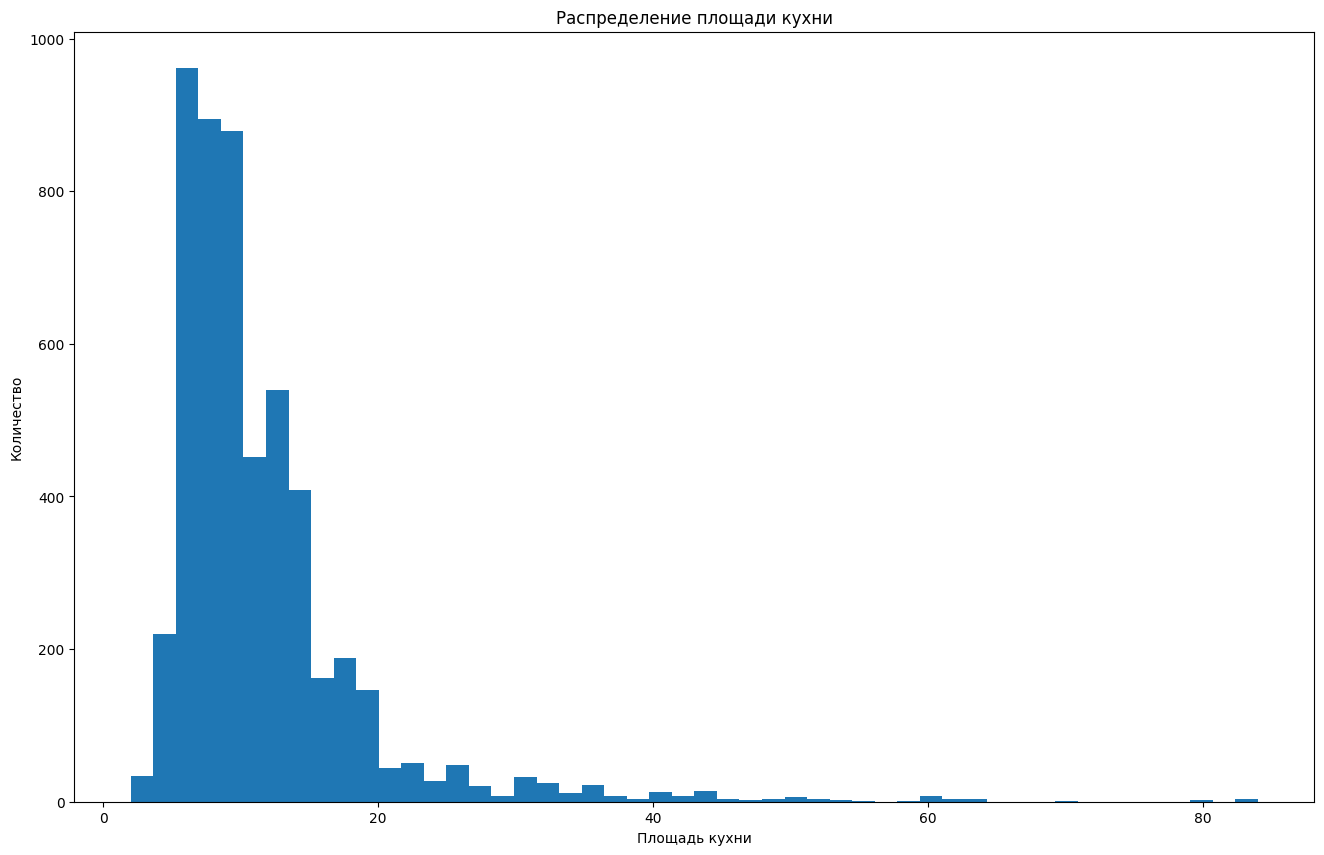

In [16]:
plt.figure(figsize=(16, 10))
plt.hist(df['kitchen_area'], bins=50,)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество')
plt.show()

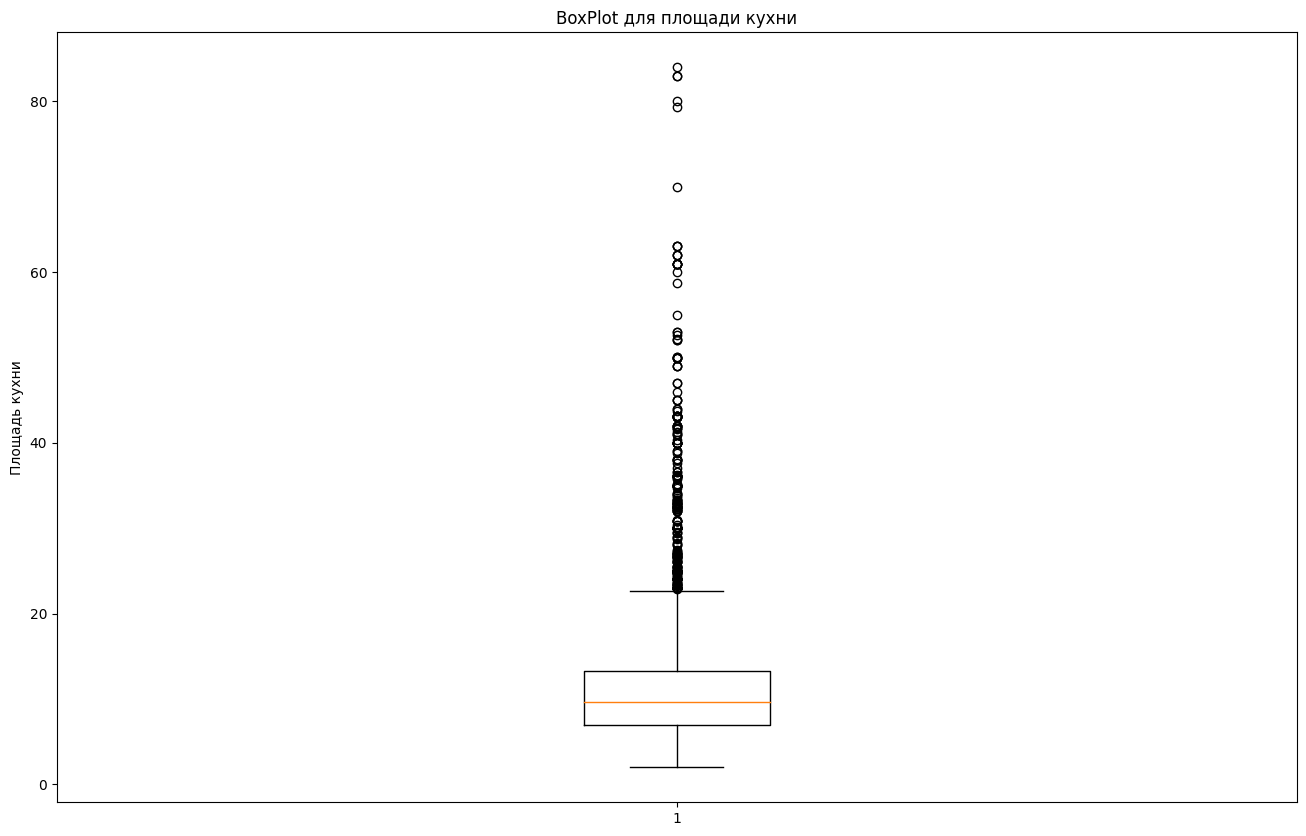

In [17]:
plt.figure(figsize=(16, 10))
plt.boxplot(df['kitchen_area'].dropna())
plt.title('BoxPlot для площади кухни')
plt.ylabel('Площадь кухни')
plt.show()

#### Высота потолков

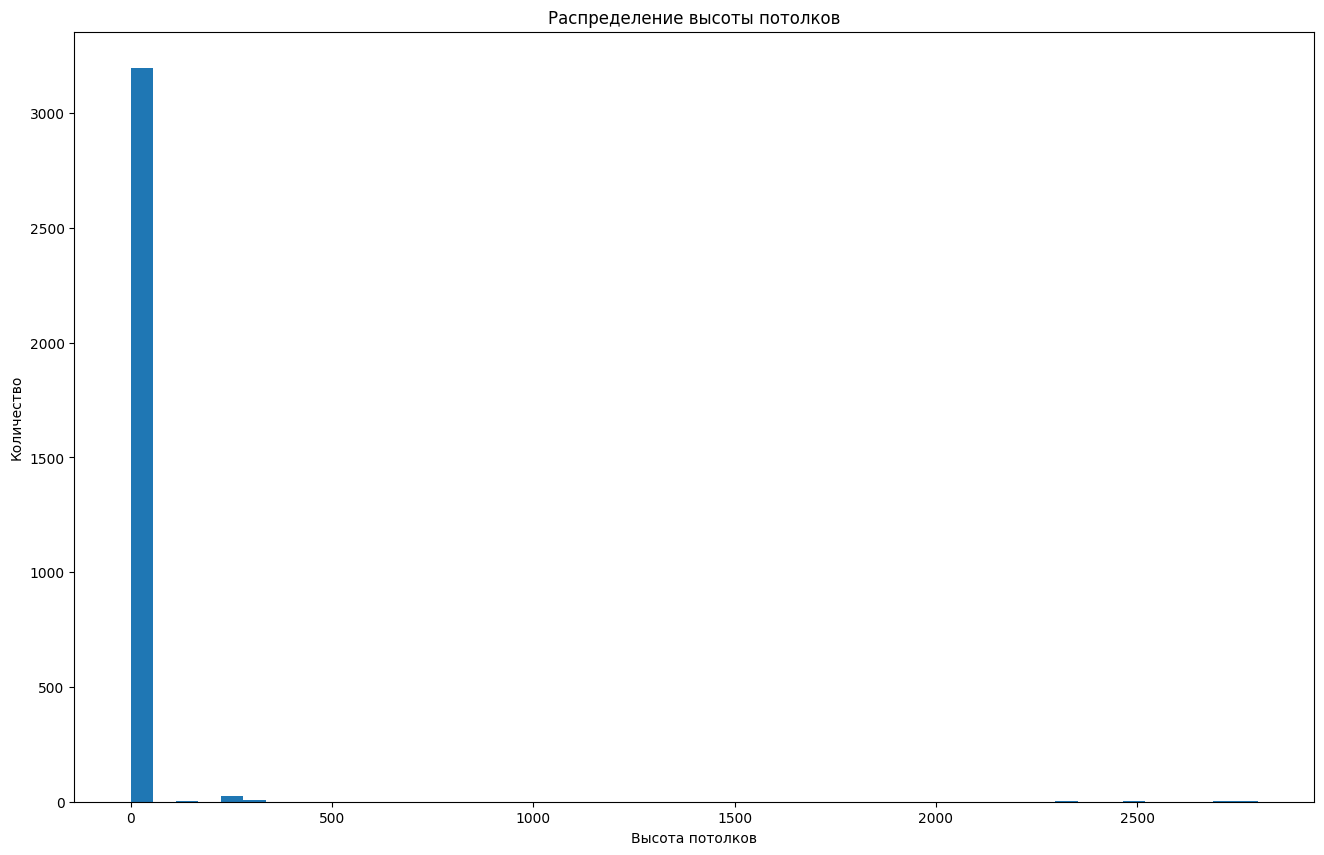

In [18]:
plt.figure(figsize=(16, 10))
plt.hist(df['ceiling_height'], bins=50,)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.show()

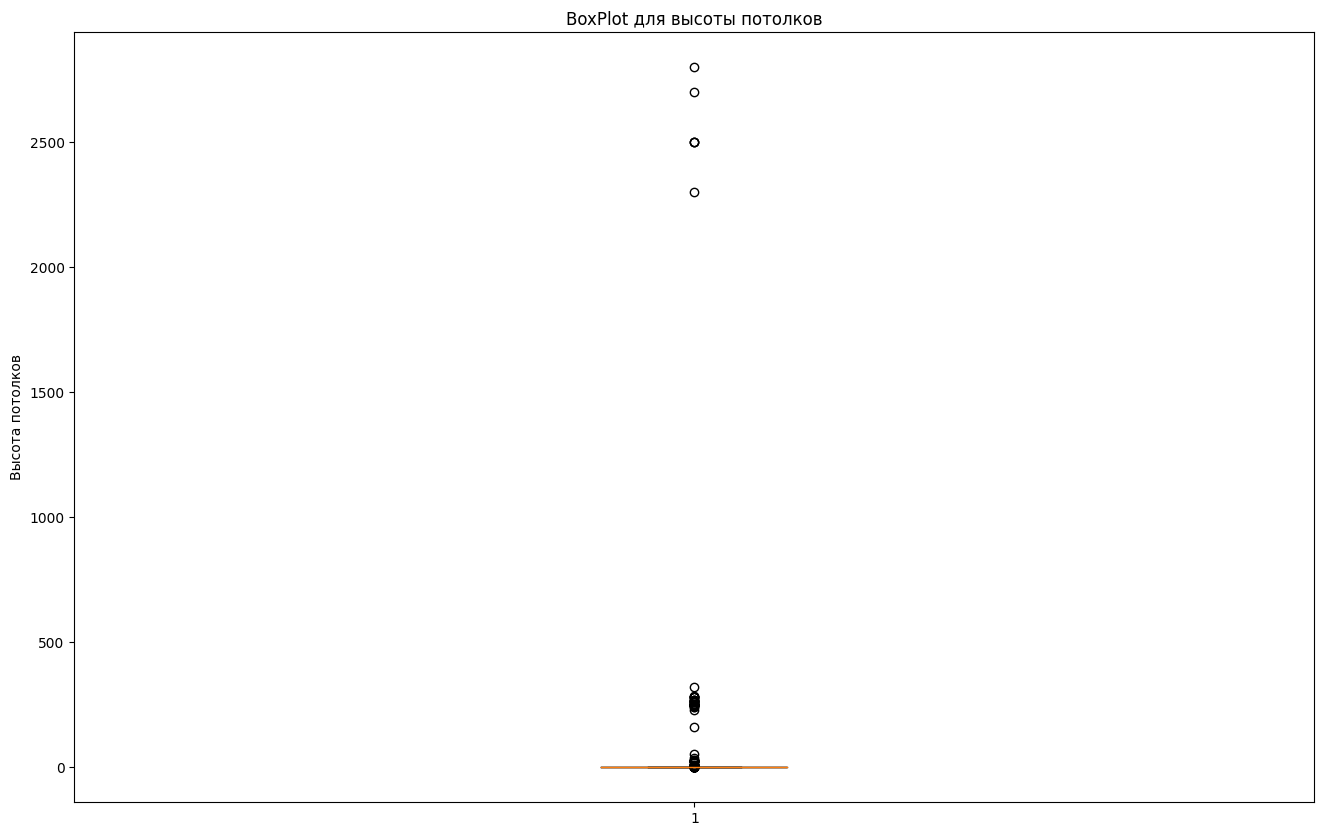

In [19]:
plt.figure(figsize=(16, 10))
plt.boxplot(df['ceiling_height'].dropna())
plt.title('BoxPlot для высоты потолков')
plt.ylabel('Высота потолков')
plt.show()

In [20]:
def normalize_ceiling_height(df):
    """
    Преобразует значения в столбце 'ceiling_height' так, чтобы первая цифра числа
    стала целой частью, а все остальные - дробной частью.
    Например: 2700.0 -> 2.7, 280.0 -> 2.8, 28.0 -> 2.8
    """
    def _convert_value(x):
        if x == 0:
            return 0.0
        try:
            # Преобразуем число в строку и удаляем точку (если это float)
            s = str(x).replace('.', '')
            # Первая цифра - целая часть, остальные - дробная
            if len(s) > 1:
                return float(f"{s[0]}.{s[1:]}")
            else:
                return float(s[0])
        except:
            return x
    
    df['ceiling_height'] = df['ceiling_height'].apply(_convert_value)
    return df

In [21]:
df = normalize_ceiling_height(df)

In [22]:
df.describe().round(3)

,Unnamed: 0,id,price,price_per_sqm,total_area,kitchen_area,living_area,floor,floors_in_building,ceiling_height,year_built,latitude,longitude,center_distance,metro_distance
count,5675.000,5.675000e+03,5.674000e+03,5675.000,5675.000,5265.000,4593.000,5675.000,5675.000,3235.000,3367.000,4913.000,4913.000,5227.000,5227.000
mean,1233.385,5.672729e+09,7.292138e+06,127385.971,54.903,11.478,30.165,6.198,11.360,2.691,1987.752,53.222,50.241,12.603,7.732
std,813.779,1.677221e+09,5.719941e+06,45663.668,25.981,7.427,15.464,5.003,6.996,0.302,97.853,0.108,1.728,110.629,110.403
min,0.000,1.848118e+08,8.000000e+05,13762.000,12.500,2.000,5.000,1.000,1.000,0.000,0.000,47.829,48.403,0.060,0.050
25%,553.000,4.342047e+09,4.150000e+06,99338.000,38.500,7.000,18.000,2.000,5.000,2.500,1972.000,53.197,50.148,5.470,1.210
50%,1115.000,4.977734e+09,5.799999e+06,118092.000,49.000,9.600,28.700,5.000,9.000,2.700,1992.000,53.218,50.198,8.260,2.730
75%,1824.500,7.326788e+09,8.400000e+06,145473.500,65.000,13.300,38.800,8.000,16.000,2.700,2015.000,53.245,50.241,11.675,5.825
max,2965.000,7.447733e+09,8.800000e+07,1110886.000,391.000,84.000,240.000,30.000,37.000,9.100,2025.000,54.425,131.225,5470.830,5458.680


## Исследуем зависимую переменную

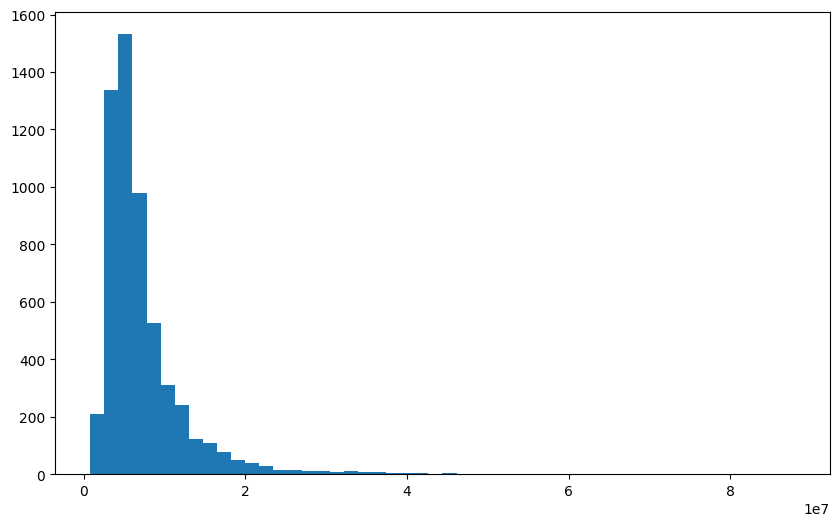

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50,)
plt.show()

In [24]:
correlation = df.corr()['price'].sort_values(ascending=False)
print(correlation)

price                 1.000000
total_area            0.819405
price_per_sqm         0.688330
living_area           0.671354
kitchen_area          0.632771
floors_in_building    0.334226
floor                 0.233695
ceiling_height        0.227450
year_built            0.073067
Unnamed: 0            0.011952
metro_distance       -0.021978
longitude            -0.027107
center_distance      -0.031824
latitude             -0.045227
id                   -0.171415
Name: price, dtype: float64


## Обработка колонок
### Модификация фичей и заполнение пропусков

In [25]:
null_count = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
null_values = pd.DataFrame({
    'column_name': df.columns,
    'null_count': null_count.values,
    'null_percentage': null_percentage.values
}).set_index('column_name').T
null_values

column_name,Unnamed: 0,id,price,price_per_sqm,number_of_owners,district,street,deal_type,number_of_rooms,total_area,kitchen_area,living_area,floor,floors_in_building,balcony_or_loggia,ceiling_height,bathroom,windows,renovation,appliances,sale_method,building_type,year_built,passenger_elevator,freight_elevator,in_building,courtyard,parking,additional_info,room_type,furniture,seller_type,data_added,latitude,longitude,center_distance,metro_distance
null_count,0.0,0.0,1.000000,0.0,0.0,727.000000,0.0,2075.000000,0.0,0.0,410.00000,1082.000000,0.0,0.0,1544.000000,2440.000000,697.000000,1555.000000,938.000000,3461.000000,511.000000,4.000000,2308.000000,1437.000000,1899.000000,3147.000000,1629.000000,1647.000000,4697.00000,2437.000000,2955.000000,0.0,0.0,762.000000,762.000000,448.000000,448.000000
null_percentage,0.0,0.0,0.017621,0.0,0.0,12.810573,0.0,36.563877,0.0,0.0,7.22467,19.066079,0.0,0.0,27.207048,42.995595,12.281938,27.400881,16.528634,60.986784,9.004405,0.070485,40.669604,25.321586,33.462555,55.453744,28.704846,29.022026,82.76652,42.942731,52.070485,0.0,0.0,13.427313,13.427313,7.894273,7.894273


#### one_hot_encoding

In [26]:
# Функция для one_hot_encoding колонок со списками
def one_hot_encoding(column_name):
    values_list = df[column_name].dropna()
    el_list = []
    for val in values_list:
        val_el = val.split(', ')
        for el in val_el:
            if el not in el_list:
                el_list.append(el)
    for el_l in el_list:
        df[el_l] = df[column_name].str.contains(el_l, case=False, na=False).astype(int)

#### Количество собственников

In [27]:
df['number_of_owners'].nunique()

36

In [28]:
df['number_of_owners'].unique().tolist()

['1 собственник',
 '2 собственника или больше',
 'Группа компаний «Новый ДОН»',
 'Группа компаний «Строительный холдинг Град»',
 'Контактное лицо',
 'Авито — сайт объявлений России. © ООО «КЕХ еКоммерц» 2007–2025. Правила Авито. Политика конфиденциальности. Оплачивая услуги на Авито, вы принимаете оферту. Авито использует рекомендательные технологии.',
 'Группа компаний «Владимир»',
 'ООО «СЗ «СПЕКТРСТРОЙ»',
 'Группа компаний «УК Альянс-Менеджмент»',
 'Группа компаний «Финстрой»',
 'Группа компаний «ВИРА»',
 'Группа компаний «Древо»',
 'Группа компаний «СтройКонтракт»',
 'Группа компаний «Корпорация КОШЕЛЕВ»',
 'Группа компаний «Развитие»',
 'ООО «СЗ «Архитектор»',
 'ООО «СЗ ПАРКОВЫЙ»',
 'ООО «Специализированный Застройщик «ГВ Девелопмент»',
 'ООО СЗ «ВОЛГА СТРОЙ ДЕВЕЛОПМЕНТ»',
 'Группа компаний «Амонд»',
 'ООО «Специализированный Застройщик «Ракита»',
 'Закажите бесплатный звонок',
 'Группа компаний «Новое Время»',
 'ООО «КОЛЬЦО»',
 'Группа компаний «Самарский хлебзавод №9»',
 'ООО «\

In [29]:
# Колонку "количество собственников" преобразуем в "собственник или застройщик"
df.loc[df['number_of_owners'].isin(['1 собственник', '2 собственника или больше', 'Контактное лицо']), 'owner_or_developer'] = 1
df['owner_or_developer'] = df['owner_or_developer'].fillna(0)
df['owner_or_developer'] = df['owner_or_developer'].astype(int)

#### Район

In [30]:
df['district'].nunique()

11

In [31]:
df['district'] = df['district'].fillna('unknown')

#### Вид сделки

In [32]:
df['deal_type'].value_counts()

возможна ипотека             3580
продажа доли                   15
аукцион                         3
возможна ипотека, аукцион       2
Name: deal_type, dtype: int64

In [33]:
df['deal_type'] = df['deal_type'].fillna('unknown')

#### Количество комнат

In [34]:
# Колонку "количество комнат" преобразуем в порядковый признак. Студии и квавртиры со свободной планировкой относим к однушкам
df.loc[df['number_of_rooms']=='студия', 'number_of_rooms'] = 1
df.loc[df['number_of_rooms']=='свободная планировка', 'number_of_rooms'] = 1
df['number_of_rooms'] = df['number_of_rooms'].astype(int)

#### Общая площадь

In [35]:
# Общая площадь сильно коррелирует с таргетом, поэтому удаляем строчки с пропущенными значениями
df = df.dropna(subset=['total_area'], axis=0)

#### Площадь кухни

In [36]:
# Заполняем пропущенные значения площади кухни на основе общей площади с помощью линеной регрессии

known_data = df[df['kitchen_area'].notna()]
unknown_data = df[df['kitchen_area'].isna()]

model = LinearRegression()
model.fit(known_data[['total_area']], known_data['kitchen_area'])
    
# Предсказываем пропущенные значения
predicted_values = model.predict(unknown_data[['total_area']])
    
# Заполняем пропущенные значения
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = predicted_values

#### Жилая площадь

In [37]:
# Заполняем пропущенные значения жилой площади на основе общей площади с помощью линеной регрессии

known_data = df[df['living_area'].notna()]
unknown_data = df[df['living_area'].isna()]

model = LinearRegression()
model.fit(known_data[['total_area']], known_data['living_area'])
    
# Предсказываем пропущенные значения
predicted_values = model.predict(unknown_data[['total_area']])
    
# Заполняем пропущенные значения
df.loc[df['living_area'].isna(), 'living_area'] = predicted_values

#### Балкон или лоджия

In [38]:
df['balcony_or_loggia'].value_counts()

лоджия            2255
балкон            1538
балкон, лоджия     338
Name: balcony_or_loggia, dtype: int64

In [39]:
# Применяем "one hot encoding" к колонке "балкон или лоджия"
df['loggia'] = df['balcony_or_loggia'].str.contains('лоджия', case=False, na=False).astype(int)
df['balcony'] = df['balcony_or_loggia'].str.contains('балкон', case=False, na=False).astype(int)

#### Высота потолков

In [40]:
# Заполняем пропущенные значения высоты потолков на основе типа здания
df["ceiling_height"] = (df["ceiling_height"].fillna(df.groupby("building_type")["ceiling_height"].transform("mean")))

#### Ванная комната

In [41]:
df['bathroom'].value_counts()

совмещенный                3070
раздельный                 1774
совмещенный, раздельный     134
Name: bathroom, dtype: int64

In [42]:
# Заполняем пропущенные значения ванной комнаты на основе количества комнат
df.loc[(df['bathroom'].isna()) & (df['number_of_rooms'].isin(['студия', '1', '2', 'свободная планировка'])), 'bathroom'] = 'совмещенный'
df['bathroom'] = df['bathroom'].fillna('раздельный')

#### Окна

In [43]:
df['windows'].value_counts()

во двор                                    1487
на улицу                                    717
во двор, на улицу                           607
во двор, на улицу, на солнечную сторону     423
во двор, на солнечную сторону               422
на улицу, на солнечную сторону              319
на солнечную сторону                        145
Name: windows, dtype: int64

In [44]:
# Применяем one_hot_encoding к колонке с окнами
one_hot_encoding('windows')

#### Ремонт

In [45]:
df['renovation'].value_counts()

косметический      2119
евро               1210
требует ремонта     837
дизайнерский        571
Name: renovation, dtype: int64

In [46]:
# Заполняем пропуски в колонке ремонт значением "unknown"
df['renovation'] = df['renovation'].fillna('unknown')

#### Техника

In [47]:
df['appliances'].value_counts()

кондиционер                                                                           488
холодильник, стиральная машина                                                        284
кондиционер, холодильник, стиральная машина                                           239
кондиционер, холодильник, стиральная машина, посудомоечная машина, водонагреватель    131
кондиционер, холодильник, стиральная машина, водонагреватель                          129
кондиционер, водонагреватель                                                          117
водонагреватель                                                                       100
холодильник                                                                            96
кондиционер, холодильник, стиральная машина, посудомоечная машина                      95
холодильник, стиральная машина, водонагреватель                                        73
кондиционер, холодильник                                                               67
стиральная

In [48]:
# Преобразуем колонку с техникой в бинарную
df['appliances'] = df['appliances'].notna().astype(int)
df['appliances'].value_counts()

0    3461
1    2214
Name: appliances, dtype: int64

#### Способ продажи

In [49]:
df['sale_method'].value_counts()

свободная                   4489
договор долевого участия     389
альтернативная               248
переуступка                   38
Name: sale_method, dtype: int64

In [50]:
# Заполняем пропуски в колонке "способ продажи" значением "unknown"
df['sale_method'] = df['sale_method'].fillna('unknown')

#### Тип здания

In [51]:
df['building_type'].value_counts()

кирпичный              2970
панельный              1427
монолитный              738
монолитно-кирпичный     423
блочный                 105
деревянный                8
Name: building_type, dtype: int64

In [52]:
# Заполняем пропуски в колонке "тип здания" значением "unknown"
df['building_type'] = df['building_type'].fillna('unknown')

#### Год постройки

In [53]:
# # Заполняем пропуски в колонке "год постройки" средним
df['year_built'] = df['year_built'].fillna(df['year_built'].mean()).round().astype(int)

#### Пасажирский лифт

In [54]:
df['passenger_elevator'].value_counts()

1      2391
нет    1369
2       439
3        27
4        12
Name: passenger_elevator, dtype: int64

In [55]:
# Колонку "пасажирский лифт" преобразуем в порядковый признак
df.loc[df['passenger_elevator']=='нет', 'passenger_elevator'] = 0
df['passenger_elevator'] = df['passenger_elevator'].fillna(0)
df['passenger_elevator'] = df['passenger_elevator'].astype(int)

#### Грузовой лифт

In [56]:
df['freight_elevator'].value_counts()

нет    2110
1      1439
2       205
3        14
4         8
Name: freight_elevator, dtype: int64

In [57]:
# Колонку "грузовой лифт" преобразуем в порядковый признак
df.loc[df['freight_elevator']=='нет', 'freight_elevator'] = 0
df['freight_elevator'] = df['freight_elevator'].fillna(0)
df['freight_elevator'] = df['freight_elevator'].astype(int)

#### В доме

In [58]:
df['in_building'].value_counts()

газ                            1789
консьерж                        328
мусоропровод, газ               293
мусоропровод                     92
консьерж, газ                    14
консьерж, мусоропровод           11
консьерж, мусоропровод, газ       1
Name: in_building, dtype: int64

In [59]:
# Применяем "one hot encoding" к колонке "в доме"
df['gas'] = df['in_building'].str.contains('газ', case=False, na=False).astype(int)
df['concierge'] = df['in_building'].str.contains('консьерж', case=False, na=False).astype(int)
df['garbage_chute'] = df['in_building'].str.contains('мусоропровод', case=False, na=False).astype(int)

#### Двор

In [60]:
df['courtyard'].value_counts()

детская площадка, спортивная площадка                         1909
детская площадка                                              1271
закрытая территория, детская площадка, спортивная площадка     532
закрытая территория, детская площадка                          178
закрытая территория                                            128
спортивная площадка                                             22
закрытая территория, спортивная площадка                         6
Name: courtyard, dtype: int64

In [61]:
# Применяем "one hot encoding" к колонке "двор"
one_hot_encoding('courtyard')

#### Двор

In [62]:
df['parking'].value_counts()

открытая во дворе                                                                3109
подземная                                                                         252
за шлагбаумом во дворе                                                            217
подземная, открытая во дворе                                                      150
открытая во дворе, за шлагбаумом во дворе                                         125
подземная, за шлагбаумом во дворе                                                  54
наземная многоуровневая, открытая во дворе                                         38
подземная, открытая во дворе, за шлагбаумом во дворе                               37
наземная многоуровневая                                                            11
подземная, наземная многоуровневая, открытая во дворе                              10
подземная, наземная многоуровневая, открытая во дворе, за шлагбаумом во дворе       9
наземная многоуровневая, открытая во дворе, за шлагбау

#### Парковка

In [63]:
# Применяем "one hot encoding" к колонке "парковка"
one_hot_encoding('parking')

#### Дополнительно

In [64]:
df['additional_info'].value_counts()

гардеробная                     635
панорамные окна                 178
гардеробная, панорамные окна    165
Name: additional_info, dtype: int64

In [65]:
# Применяем "one hot encoding" к колонке "дополнительно"
one_hot_encoding('additional_info')

#### Тип комнат

In [66]:
df['room_type'].value_counts()

изолированные             2624
смежные                    350
изолированные, смежные     264
Name: room_type, dtype: int64

In [67]:
# Применяем "one hot encoding" к колонке "тип комнат"
one_hot_encoding('room_type')

#### Мебель

In [68]:
df['furniture'].value_counts()

кухня, хранение одежды, спальные места    1366
кухня, хранение одежды                     606
кухня                                      555
кухня, спальные места                      125
хранение одежды                             37
хранение одежды, спальные места             21
спальные места                              10
Name: furniture, dtype: int64

In [69]:
# Применяем "one hot encoding" к колонке "мебель"
one_hot_encoding('furniture')

#### Тип продавца

In [70]:
df['seller_type'].value_counts()

агентство       3661
частное лицо    2014
Name: seller_type, dtype: int64

In [71]:
# Преобразуем колонку с "тип продвца" в бинарную: 0-агентство, 1-частное лицо
df.loc[df['seller_type']=='агентство', 'seller_type'] = 0
df.loc[df['seller_type']=='частное лицо', 'seller_type'] = 1
df['seller_type'] = df['seller_type'].astype(int)

#### Создаем новый признак расстояние до центра города

In [72]:
# Загружаем координаты центра города
point1 = pd.read_json('./center_coords.json')
point1 = (point1.loc[0,'latitude'], point1.loc[0,'longitude'])

In [73]:
# Cоздаем функцию по расчету расстояния до центра
def calculate_distance(row):
    if not(pd.isnull(row['latitude']) and pd.isnull(row['longitude'])): 
        point2 = (row['latitude'], row['longitude'])
        dist = geodesic(point1, point2).kilometers
        return round(dist,2)
    else:
        return None

In [74]:
# Расчитываем расстояние до центра города
df['center_distance'] = df.apply(calculate_distance, axis=1)

In [75]:
df = df.dropna(subset=['center_distance'], axis=0)

### Удаляем лишние колонки

In [76]:
df = df.drop(columns=['Unnamed: 0', 'id', 'price_per_sqm', 'data_added', 'street'])

In [77]:
df = df.drop(columns=['number_of_owners', 'deal_type', 'balcony_or_loggia', 'in_building', 'courtyard', 'year_built',
                     'parking', 'windows', 'additional_info', 'room_type', 'furniture', 'latitude', 'longitude'])

In [78]:
df = df.dropna(subset=['ceiling_height'], axis=0)

In [79]:
# Удаляем строчки с пропущенными значениями таргета
df = df.dropna(subset=['price'], axis=0)

In [80]:
# Преобразуем колонку с "цена" в вещественную
df['price'] = df['price'].astype(int)

In [81]:
null_count = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
null_values = pd.DataFrame({
    'column_name': df.columns,
    'null_count': null_count.values,
    'null_percentage': null_percentage.values
}).set_index('column_name').T
null_values

column_name,price,district,number_of_rooms,total_area,kitchen_area,living_area,floor,floors_in_building,ceiling_height,bathroom,renovation,appliances,sale_method,building_type,passenger_elevator,freight_elevator,seller_type,center_distance,metro_distance,owner_or_developer,loggia,balcony,во двор,на солнечную сторону,на улицу,gas,concierge,garbage_chute,детская площадка,спортивная площадка,закрытая территория,открытая во дворе,подземная,за шлагбаумом во дворе,наземная многоуровневая,панорамные окна,гардеробная,изолированные,смежные,кухня,хранение одежды,спальные места
null_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
null_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df.dtypes.value_counts()

int32      29
float64     8
object      5
dtype: int64

In [83]:
df['price'].dtype

dtype('int32')

In [84]:
r = df['price'].quantile(0.75) - df['price'].quantile(0.25) 
upper_quantile = df['price'].quantile(0.75)+1.5 * r
df[df['price']>upper_quantile].shape
df = df[(df['price']<upper_quantile)]

In [85]:
categorical_columns = df.select_dtypes(include=[object])
categorical_columns.describe()

,district,bathroom,renovation,sale_method,building_type
count,4529,4529,4529,4529,4529
unique,12,3,5,5,7
top,Kirovsky,совмещенный,косметический,свободная,кирпичный
freq,775,2561,1897,3810,2408


In [86]:
from sklearn.preprocessing import OneHotEncoder, TargetEncoder

for col in categorical_columns:
    
    ### Для колонок с маленькой размерностью — OneHotEncoder
    if df[col].nunique() <= 10:
        # Создаем и применяем OneHotEncoder (drop_first=True для удаления первого уровня)
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        encoded_data = encoder.fit_transform(df[[col]])
        
        # Получаем имена новых колонок (например, "col_1", "col_2")
        new_columns = encoder.get_feature_names_out([col])
        
        # Создаем DataFrame с новыми колонками
        encoded_df = pd.DataFrame(encoded_data, columns=new_columns, index=df.index)
        
        # Удаляем исходную колонку и добавляем закодированные
        df = df.drop(col, axis=1)
        df = pd.concat([df, encoded_df], axis=1)
        
    ### Для остальных — TargetEncoder
    else:
        encoder = TargetEncoder(target_type='continuous')
        df[col] = encoder.fit_transform(df[[col]], df['price'])

In [87]:
df.dtypes.value_counts()

int32      29
float64    25
dtype: int64

In [88]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

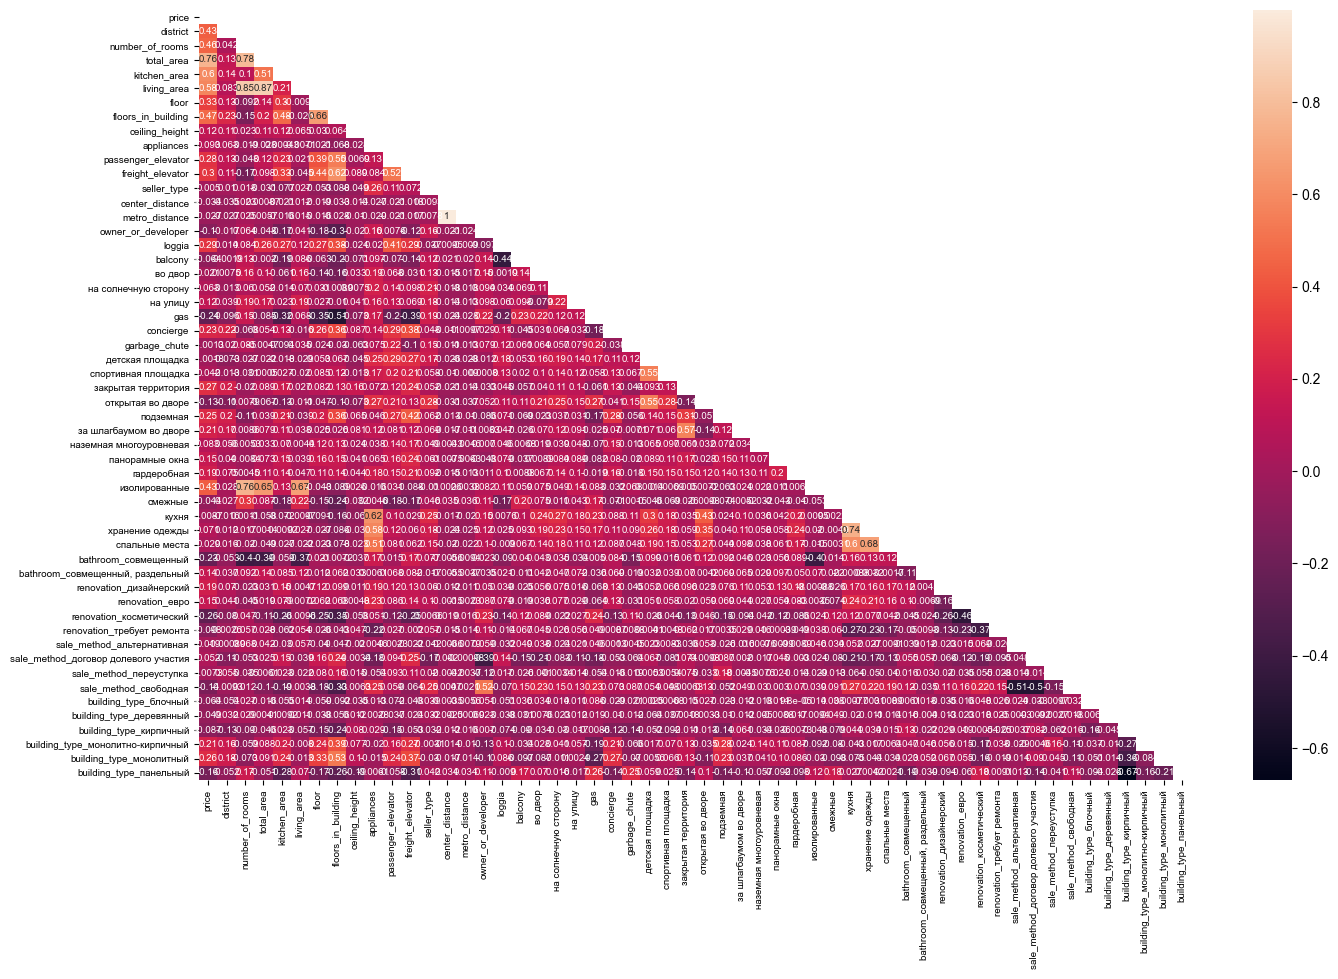

In [89]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 7})
sns.set_style('white')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

<AxesSubplot:xlabel='total_area', ylabel='price'>

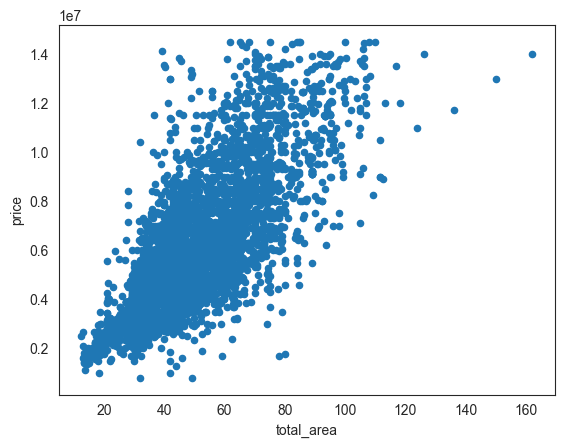

In [90]:
df.plot.scatter(x='total_area', y='price')

In [91]:
X = df.drop('price', axis=1)
y =  df['price']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso  # L1-регуляризация
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from math import sqrt

numeric_cols = ['total_area', 'kitchen_area', 'living_area', 'floor', 'floors_in_building', 'ceiling_height']
categorical_cols = list(set(X.columns) - set(numeric_cols))

# 4. Создание пайплайна с выборочным масштабированием
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Масштабируем только числовые
        ('cat', 'passthrough', categorical_cols)  # Категориальные оставляем как есть
    ])

# 5. Пайплайн с LinearRegression регрессией
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Функция для MAPE (с защитой от деления на 0)
def mape_score(y_true, y_pred):
    mask = y_true != 0  # исключаем нулевые значения
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Функция для Adjusted R²
def adjusted_r2_score(y_true, y_pred, X):
    n = len(y_true)  # количество наблюдений
    p = X.shape[1]   # количество признаков
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Создаем кастомные scorer'ы
scoring = {
    'rmse': 'neg_mean_squared_error',
    'mape': make_scorer(mape_score, greater_is_better=False),
    'r2': 'r2',
    'adjusted_r2': make_scorer(adjusted_r2_score, X=X_train)  # X_train нужен для расчета p
}

# 6. Кросс-валидация (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(pipeline, X_train, y_train, 
                          cv=kf, 
                          scoring=scoring,
                          return_train_score=True)  # Добавляем эту опцию

# Вывод результатов
print("=== Тренировочные фолды ===")
print(f"RMSE: {np.sqrt(-cv_results['train_rmse'].mean()):.3f}")
print(f"MAPE: {-cv_results['train_mape'].mean():.2f}%")  # учитываем greater_is_better=False
print(f"R²: {cv_results['train_r2'].mean():.3f}")
print(f"Adjusted R²: {cv_results['train_adjusted_r2'].mean():.3f}")

print("\n=== Тестовые фолды ===")
print(f"RMSE: {np.sqrt(-cv_results['test_rmse'].mean()):.3f}")
print(f"MAPE: {-cv_results['test_mape'].mean():.2f}%")
print(f"R²: {cv_results['test_r2'].mean():.3f}")
print(f"Adjusted R²: {cv_results['test_adjusted_r2'].mean():.3f}")


=== Тренировочные фолды ===
RMSE: 1116223.815
MAPE: 15.08%
R²: 0.828
Adjusted R²: 0.825

=== Тестовые фолды ===
RMSE: 1143500.613
MAPE: 15.37%
R²: 0.820
Adjusted R²: 0.805


In [105]:
from sklearn.linear_model import Ridge  # L2-регуляризация

# 5. Пайплайн с LinearRegression регрессией
pipeline_l2 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=10))
])

cv_results_l2 = cross_validate(pipeline_l2, X_train, y_train, 
                          cv=kf, 
                          scoring=scoring,
                          return_train_score=True)  # Добавляем эту опцию

# Вывод результатов
print("=== Тренировочные фолды ===")
print(f"RMSE: {np.sqrt(-cv_results_l2['train_rmse'].mean()):.3f}")
print(f"MAPE: {-cv_results_l2['train_mape'].mean():.2f}%")  # учитываем greater_is_better=False
print(f"R²: {cv_results_l2['train_r2'].mean():.3f}")
print(f"Adjusted R²: {cv_results_l2['train_adjusted_r2'].mean():.3f}")

print("\n=== Тестовые фолды ===")
print(f"RMSE: {np.sqrt(-cv_results_l2['test_rmse'].mean()):.3f}")
print(f"MAPE: {-cv_results_l2['test_mape'].mean():.2f}%")
print(f"R²: {cv_results_l2['test_r2'].mean():.3f}")
print(f"Adjusted R²: {cv_results_l2['test_adjusted_r2'].mean():.3f}")


=== Тренировочные фолды ===
RMSE: 1120048.614
MAPE: 15.18%
R²: 0.827
Adjusted R²: 0.824

=== Тестовые фолды ===
RMSE: 1144822.040
MAPE: 15.44%
R²: 0.819
Adjusted R²: 0.805


In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(pipeline_l2, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучший alpha:", grid_search.best_params_)

D:\anaconda3\envs\karpov\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.48663e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\anaconda3\envs\karpov\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.46515e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\anaconda3\envs\karpov\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.46737e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\anaconda3\envs\karpov\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.47256e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\anaconda3\envs\karpov\lib\site-packages\sklearn\linear_model\_ridge.py:20

Лучший alpha: {'model__alpha': 1}


In [96]:
from sklearn.model_selection import cross_val_predict

# Получаем предсказания на всех фолдах
cv_predictions = cross_val_predict(pipeline, X_train, y_train, cv=kf)

cv_results_df = pd.DataFrame({
    'actual_price': y_train,
    'predicted_price': cv_predictions
})

# Преобразуем в int (вариант 1)
cv_results_df['actual_price'] = cv_results_df['actual_price'].astype('int64')
cv_results_df['predicted_price'] = cv_results_df['predicted_price'].round().astype('int64')  # Сначала округляем

# Добавляем новые столбцы
cv_results_df['разница'] = cv_results_df['predicted_price'] - cv_results_df['actual_price']
cv_results_df['квадрат_разницы'] = cv_results_df['разница'] ** 2
cv_results_df['корень_из_квадрата'] = np.sqrt(cv_results_df['квадрат_разницы'])
cv_results_df['абс_проц_ошибка'] = round((cv_results_df['корень_из_квадрата'] / cv_results_df['actual_price']) * 100, 2)

print("\nТипы данных:")
print(cv_results_df.dtypes)
cv_results_df.head()


Типы данных:
actual_price            int64
predicted_price         int64
разница                 int64
квадрат_разницы         int64
корень_из_квадрата    float64
абс_проц_ошибка       float64
dtype: object


,actual_price,predicted_price,разница,квадрат_разницы,корень_из_квадрата,абс_проц_ошибка
1247,5650000,6336281,686281,470981610961,686281.0,12.15
5472,5400000,6929079,1529079,2338082588241,1529079.0,28.32
356,7300000,8430801,1130801,1278710901601,1130801.0,15.49
5193,5707104,5607893,-99211,9842822521,99211.0,1.74
4066,5850000,7773573,1923573,3700133086329,1923573.0,32.88


In [97]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cv_results_df.describe()

,actual_price,predicted_price,разница,квадрат_разницы,корень_из_квадрата,абс_проц_ошибка
count,3623.00,3623.00,3623.00,3623.00,3623.00,3623.00
mean,6007518.87,6006761.73,-757.14,1307607015586.32,824131.85,15.37
std,2695772.49,2455418.03,1143664.05,2923328430748.91,792834.92,19.64
min,800000.00,172218.00,-5683195.00,25.00,5.00,0.00
25%,4032000.00,4215952.50,-585018.50,73341597264.50,270816.50,5.04
50%,5500000.00,5697368.00,41102.00,363575232784.00,602972.00,11.46
75%,7399500.00,7453882.00,629161.00,1242599630502.50,1114719.50,20.01
max,14500000.00,17913771.00,6604693.00,43621969624249.00,6604693.00,459.12


In [98]:
cv_results_df_1 = cv_results_df[cv_results_df['actual_price']<=5000000]
cv_results_df_1.describe()

,actual_price,predicted_price,разница,квадрат_разницы,корень_из_квадрата,абс_проц_ошибка
count,1568.00,1568.00,1568.00,1568.00,1568.00,1568.00
mean,3727322.61,3990718.66,263396.05,831032934608.73,661030.57,19.74
std,846959.44,1185203.50,873007.17,2175703240909.35,627951.44,27.00
min,800000.00,172218.00,-2108968.00,47089.00,217.00,0.00
25%,3100000.00,3148163.25,-302318.25,55118949115.75,234774.25,6.29
50%,3900000.00,4025034.00,170978.50,247301382952.00,497294.00,13.59
75%,4400000.00,4732463.50,702212.25,832091130199.75,912190.25,25.05
max,5000000.00,9741741.00,6604693.00,43621969624249.00,6604693.00,459.12


In [99]:
cv_results_df_2 = cv_results_df[(cv_results_df['actual_price']>5000000) & (cv_results_df['actual_price']<=10000000)]
cv_results_df_2.describe()

,actual_price,predicted_price,разница,квадрат_разницы,корень_из_квадрата,абс_проц_ошибка
count,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00
mean,6880087.62,6921509.46,41421.84,1101110461781.75,791936.72,11.62
std,1347118.45,1483062.20,1048830.04,2177206288876.20,688641.27,9.91
min,5012650.00,3145119.00,-5584346.00,25.00,5.00,0.00
25%,5800000.00,5847180.00,-602224.00,73439916004.00,270998.00,3.97
50%,6500000.00,6764644.00,31278.00,403594654681.00,635291.00,9.39
75%,7800000.00,7855888.00,672453.00,1243599668224.00,1115168.00,16.29
max,10000000.00,12539593.00,4761611.00,31184920247716.00,5584346.00,71.21


In [100]:
cv_results_df_3 = cv_results_df[cv_results_df['actual_price']>10000000]
cv_results_df_3.describe()

,actual_price,predicted_price,разница,квадрат_разницы,корень_из_квадрата,абс_проц_ошибка
count,362.00,362.00,362.00,362.00,362.00,362.00
mean,11803344.35,10461147.40,-1342196.96,4337625867973.01,1681173.78,13.94
std,1206522.37,1615648.92,1594728.35,5708299482929.68,1231043.04,9.66
min,10004800.00,6605675.00,-5683195.00,113550336.00,10656.00,0.09
25%,10800000.00,9510046.25,-2271302.50,443332439539.00,665813.50,5.64
50%,11581900.00,10430094.00,-1411122.00,2153670835546.00,1467539.00,12.57
75%,12648530.00,11298409.75,-282658.50,5384693640574.75,2320489.25,19.62
max,14500000.00,17913771.00,4080618.00,32298705408025.00,5683195.00,42.56


In [101]:
cv_results_df_4 = cv_results_df[cv_results_df['абс_проц_ошибка']>50]
cv_results_df_4.describe()

,actual_price,predicted_price,разница,квадрат_разницы,корень_из_квадрата,абс_проц_ошибка
count,105.00,105.00,105.00,105.00,105.00,105.00
mean,3321509.51,5473640.86,2152131.34,7461866390185.30,2481678.05,87.46
std,1688211.36,2355285.60,1690387.68,7484788640543.64,1147026.88,66.38
min,800000.00,172218.00,-5584346.00,539079008400.00,734220.00,50.15
25%,2280000.00,4099226.00,1718076.00,2990461197025.00,1729295.00,56.97
50%,3000000.00,5120024.00,2173283.00,4779208099600.00,2186140.00,65.69
75%,4000000.00,6592751.00,2987046.00,9667472873536.00,3109256.00,82.78
max,10000000.00,11879972.00,6604693.00,43621969624249.00,6604693.00,459.12


In [102]:
result = df.loc[df.index.isin(cv_results_df_4.index)]
result

,price,district,number_of_rooms,total_area,kitchen_area,living_area,floor,floors_in_building,ceiling_height,appliances,passenger_elevator,freight_elevator,seller_type,center_distance,metro_distance,owner_or_developer,loggia,balcony,во двор,на солнечную сторону,на улицу,gas,concierge,garbage_chute,детская площадка,спортивная площадка,закрытая территория,открытая во дворе,подземная,за шлагбаумом во дворе,наземная многоуровневая,панорамные окна,гардеробная,изолированные,смежные,кухня,хранение одежды,спальные места,bathroom_совмещенный,"bathroom_совмещенный, раздельный",renovation_дизайнерский,renovation_евро,renovation_косметический,renovation_требует ремонта,sale_method_альтернативная,sale_method_договор долевого участия,sale_method_переуступка,sale_method_свободная,building_type_блочный,building_type_деревянный,building_type_кирпичный,building_type_монолитно-кирпичный,building_type_монолитный,building_type_панельный
22,3850000,6048529.78,3,59.00,6.00,42.00,1.00,3.00,2.76,0,0,0,0,12.71,2.61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
68,1000000,4492653.08,1,18.40,3.00,12.00,1.00,5.00,2.70,0,0,0,0,36.26,33.80,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
73,1750000,4961788.73,1,80.00,20.00,20.00,5.00,5.00,2.70,0,0,0,0,13.54,2.73,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
92,3000000,8076610.89,1,23.00,5.87,12.96,2.00,4.00,2.70,1,0,0,0,0.46,3.09,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
122,2600000,7123458.17,2,52.50,9.00,32.00,2.00,2.00,2.60,1,0,0,1,38.46,41.78,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,1890000,7868671.47,1,14.00,4.34,10.00,4.00,5.00,2.70,1,0,0,0,7.34,3.06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
5475,1680000,7085940.96,1,16.50,4.77,16.50,2.00,5.00,2.50,1,0,0,1,32.75,21.06,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
5645,5600000,4726214.24,2,80.00,25.00,44.88,1.00,10.00,2.50,1,1,0,0,6.46,9.66,1,1,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
5646,7100000,4731920.51,3,105.00,18.00,60.00,10.00,10.00,2.62,1,1,0,0,9.29,11.77,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,0,1,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00


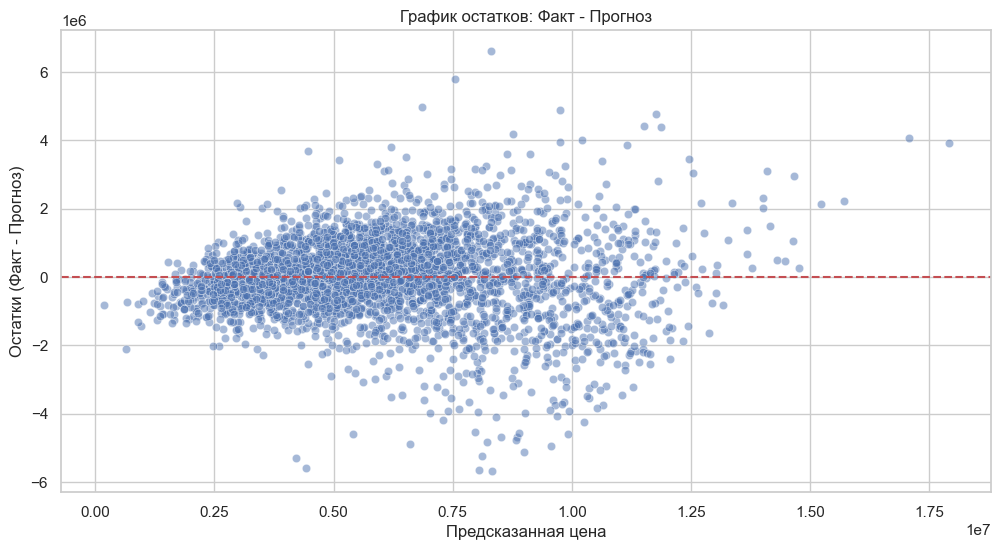

In [103]:
# Настраиваем стиль
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# График остатков vs предсказанные значения
sns.scatterplot(
    x='predicted_price', 
    y='разница',
    data=cv_results_df,
    alpha=0.5
)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков: Факт - Прогноз')
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки (Факт - Прогноз)')
plt.show()

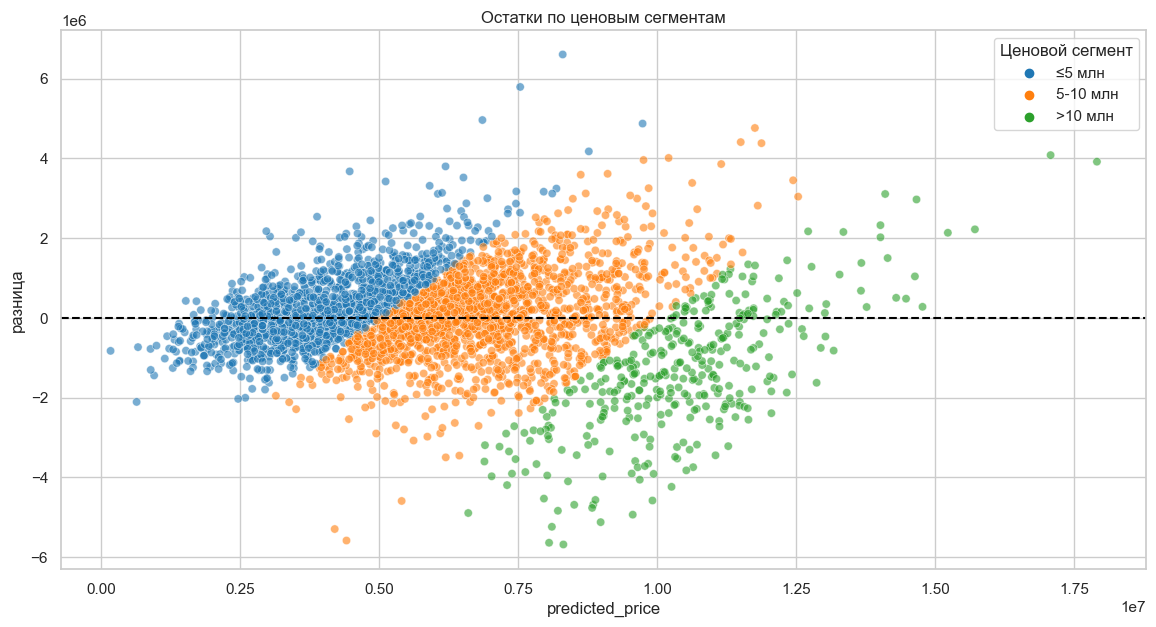

In [104]:
# Добавляем сегменты
cv_results_df['сегмент'] = pd.cut(
    cv_results_df['actual_price'],
    bins=[0, 5e6, 10e6, np.inf],
    labels=['≤5 млн', '5-10 млн', '>10 млн']
)

# График с цветовой кодировкой
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x='predicted_price', 
    y='разница',
    hue='сегмент',
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
    data=cv_results_df,
    alpha=0.6
)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Остатки по ценовым сегментам')
plt.legend(title='Ценовой сегмент')
plt.show()